In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sympy
from expanders import *

# Expander graphs mixing time

For a given graph $\mathcal{G} = (V, E)$, the **mixing time** is defined as :
$$
t_m(\mathcal{G}) = \inf \big\{ t\in \mathbb{N}, \forall \mu \in \mathcal{M}^1_+(V), \  \lVert \mu P^t - \pi \rVert \leq \frac{1}{\lvert V \rvert} \big\},
$$
where $\pi$ is the stationary distribution of the standard random walk on $\mathcal{G}$ (as usual, under mild assumptions on the graph such that it is connected, to guarantee existence and unicity of the measure $\pi$).

In practice, one can estimate this quantity by sampling a few initial node distribution $\mu\in\mathcal{M}^1_+(V)$ at random or by evaluating against a set of test distributions such as $\big\{ \delta_v, v\in V\big\}$.

Expander graphs are regular graphs characterized by their spectral gap. As a  consequence, the mixing times of a growing family of expanders $\big(\mathcal{G}_n \big)_{n\in\mathbb{N}}$ is at most logarithmic in the number of nodes:

$$
t_m(\mathcal{G}_n) = \mathcal{O}\big(\log \lvert \mathcal{G}_n\rvert \big)
$$

## LPS3

100%|██████████| 50/50 [00:14<00:00,  3.37it/s]


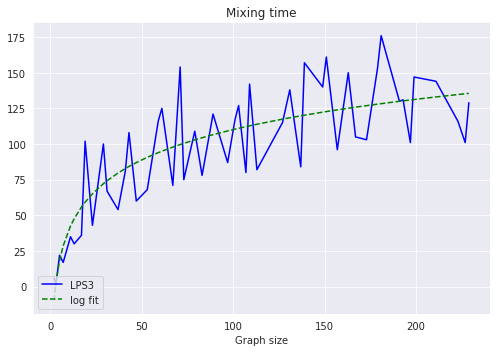

In [2]:
walk_length = 250

n_samples = int(1e3) # Evaluate mxing against Dirac masses at each node
# n_samples = -1 # Evaluate mxing against Dirac masses at each node
n_iter = 50
ns = np.empty(n_iter)
mixing_err_lps3 = np.empty((n_iter, walk_length))
mixing_times_lps3 = np.empty(n_iter)

with tqdm(total=n_iter) as pbar:
    for k in range(n_iter):
        p = sympy.prime(k+1)
        builder_lps3 = LPS3(p, remove_parallel_edges=False, remove_self_edges=False)
        builder_lps3.build()
        
        n = builder_lps3.G.number_of_nodes()
        mixing_err = builder_lps3.mixing_errors(walk_length, n_samples)
        
        # Find first time for which mixing_err < 1/n
        idx = np.where(mixing_err<1/n)[0]
        if len(idx) == 0:
            mixing_times_lps3[k] = walk_length
        else:
            mixing_times_lps3[k] = idx[0]
        ns[k] = n
        mixing_err_lps3[k] = mixing_err

        pbar.update(1)
        
popt = np.polyfit(np.log(ns), mixing_times_lps3, 1)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
    ax.plot(ns, mixing_times_lps3, label='LPS3', color='b')
    ax.plot(ns, popt[0] * np.log(ns) + popt[1], label='log fit', color='g', linestyle='dashed')
    ax.set_xlabel('Graph size')
    ax.set_title('Mixing time')
    ax.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

## Margulis

100%|██████████| 20/20 [00:01<00:00, 10.77it/s]


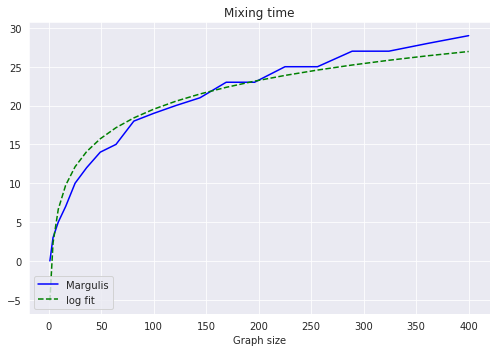

In [3]:
walk_length = 100

# n_samples = int(1e3) # Evaluate mxing against Dirac masses at each node
n_samples = -1 # Evaluate mxing against Dirac masses at each node
n_iter = 20
ns = np.empty(n_iter)
mixing_err_margulis = np.empty((n_iter, walk_length))
mixing_times_margulis = np.empty(n_iter)

with tqdm(total=n_iter) as pbar:
    for k in range(n_iter):
        builder_margulis = Margulis(k+1, remove_parallel_edges=False, remove_self_edges=False)
        builder_margulis.build()
        
        n = builder_margulis.G.number_of_nodes()
        mixing_err = builder_margulis.mixing_errors(walk_length, n_samples)
        
        # Find first time for which mixing_err < 1/n
        idx = np.where(mixing_err<1/n)[0]
        if len(idx) == 0:
            mixing_times_margulis[k] = walk_length
        else:
            mixing_times_margulis[k] = idx[0]
        ns[k] = n
        mixing_err_margulis[k] = mixing_err

        pbar.update(1)
        
popt = np.polyfit(np.log(ns), mixing_times_margulis, 1)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
    ax.plot(ns, mixing_times_margulis, label='Margulis', color='b')
    ax.plot(ns, popt[0] * np.log(ns) + popt[1], label='log fit', color='g', linestyle='dashed')
    ax.set_xlabel('Graph size')
    ax.set_title('Mixing time')
    ax.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

## Paley

In [4]:
qs = []
q_lim = 500

for pth in range(3, 100):
    for exponent in range(3):
        try:
            p = sympy.prime(pth+1)
            q = p ** (exponent+1)
            check_q(q)
            if q <= q_lim:
                qs.append(q)
        except:
            pass

qs = np.sort(np.array(qs))

100%|██████████| 48/48 [00:15<00:00,  3.12it/s]


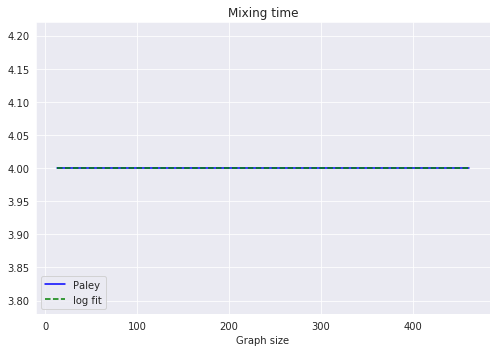

In [5]:
walk_length = 100

# n_samples = int(1e3) # Evaluate mxing against Dirac masses at each node
n_samples = -1 # Evaluate mxing against Dirac masses at each node
n_iter = len(qs)
ns = np.empty(n_iter)
mixing_err_paley = np.empty((n_iter, walk_length))
mixing_times_paley = np.empty(n_iter)

with tqdm(total=n_iter) as pbar:
    for k in range(n_iter):
        q = int(qs[k])
        builder_paley = Paley(q)
        builder_paley.build()
        
        n = builder_paley.G.number_of_nodes()
        mixing_err = builder_paley.mixing_errors(walk_length, n_samples)
        
        # Find first time for which mixing_err < 1/n
        idx = np.where(mixing_err < 1/n)[0]
        if len(idx) == 0:
            mixing_times_paley[k] = walk_length
        else:
            mixing_times_paley[k] = idx[0]
        ns[k] = n
        mixing_err_paley[k] = mixing_err

        pbar.update(1)

popt = np.polyfit(np.log(ns), mixing_times_paley, 1)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
    ax.plot(ns, mixing_times_paley, label='Paley', color='b')
    ax.plot(ns, popt[0] * np.log(ns) + popt[1], label='log fit', color='g', linestyle='dashed')
    ax.set_xlabel('Graph size')
    ax.set_title('Mixing time')
    ax.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

## Random regular graphs

### 4-regular

100%|██████████| 400/400 [00:44<00:00,  8.96it/s]


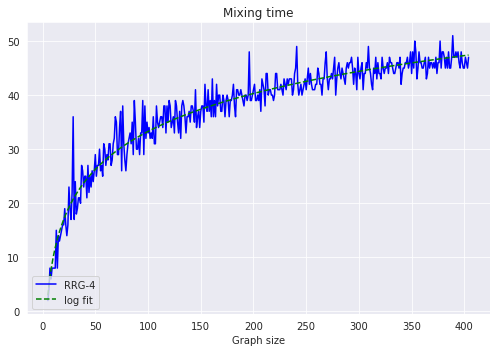

In [6]:
d = 4

walk_length = 100

# n_samples = int(1e3) # Evaluate mxing against Dirac masses at each node
n_samples = -1 # Evaluate mxing against Dirac masses at each node
n_iter = 400
ns = np.empty(n_iter)
mixing_err_rrg = np.empty((n_iter, walk_length))
mixing_times_rrg = np.empty(n_iter)

with tqdm(total=n_iter) as pbar:
    for k in range(n_iter):
        builder_rrg = RRG(d, k + d + 1)
        builder_rrg.build()
        
        n = builder_rrg.G.number_of_nodes()
        mixing_err = builder_rrg.mixing_errors(walk_length, n_samples)
        
        # Find first time for which mixing_err < 1/n
        idx = np.where(mixing_err<1/n)[0]
        if len(idx) == 0:
            mixing_times_rrg[k] = walk_length
        else:
            mixing_times_rrg[k] = idx[0]
        ns[k] = n
        mixing_err_rrg[k] = mixing_err

        pbar.update(1)
        
popt = np.polyfit(np.log(ns), mixing_times_rrg, 1)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
    ax.plot(ns, mixing_times_rrg, label='RRG-4', color='b')
    ax.plot(ns, popt[0] * np.log(ns) + popt[1], label='log fit', color='g', linestyle='dashed')
    ax.set_xlabel('Graph size')
    ax.set_title('Mixing time')
    ax.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

### 16-regular

100%|██████████| 400/400 [00:52<00:00,  7.64it/s]


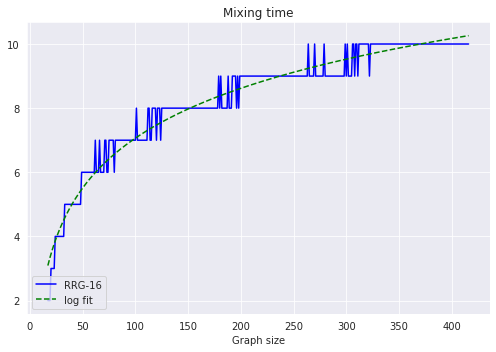

In [7]:
d = 16

walk_length = 100

# n_samples = int(1e3) # Evaluate mxing against Dirac masses at each node
n_samples = -1 # Evaluate mxing against Dirac masses at each node
n_iter = 400
ns = np.empty(n_iter)
mixing_err_rrg = np.empty((n_iter, walk_length))
mixing_times_rrg = np.empty(n_iter)

with tqdm(total=n_iter) as pbar:
    for k in range(n_iter):
        builder_rrg = RRG(d, k + d +1)
        builder_rrg.build()
        
        n = builder_rrg.G.number_of_nodes()
        mixing_err = builder_rrg.mixing_errors(walk_length, n_samples)
        
        # Find first time for which mixing_err < 1/n
        idx = np.where(mixing_err<1/n)[0]
        if len(idx) == 0:
            mixing_times_rrg[k] = walk_length
        else:
            mixing_times_rrg[k] = idx[0]
        ns[k] = n
        mixing_err_rrg[k] = mixing_err

        pbar.update(1)
        
popt = np.polyfit(np.log(ns), mixing_times_rrg, 1)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
    ax.plot(ns, mixing_times_rrg, label='RRG-16', color='b')
    ax.plot(ns, popt[0] * np.log(ns) + popt[1], label='log fit', color='g', linestyle='dashed')
    ax.set_xlabel('Graph size')
    ax.set_title('Mixing time')
    ax.legend(loc='lower left')
    plt.tight_layout()
    plt.show()